In [ ]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras import datasets,models,layers
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

SIZE_X = SIZE_Y = 224
batch_size=64
ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/ML/MLDATA',
    labels='inferred',
    label_mode = "categorical",
    color_mode='rgb',
    batch_size= batch_size,
    image_size=(SIZE_X,SIZE_Y),
    seed=123,
    validation_split=0.2,
    subset='training',
)
ds_validation = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/ML/MLDATA',
    labels='inferred',
    label_mode = "categorical",
    color_mode='rgb',
    batch_size= batch_size,
    image_size=(SIZE_X,SIZE_Y),
    seed=123,
    validation_split=0.2,
    subset='validation',
)

Found 1739 files belonging to 5 classes.
Using 1392 files for training.
Found 1739 files belonging to 5 classes.
Using 347 files for validation.


In [ ]:

def augment(x,y):
  image = tf.image.random_brightness(x, max_delta=0.05)
  return image,y

ds_train = ds_train.map(augment)

In [ ]:
# importing the libraries
from keras.models import Model
from keras.layers import Flatten, Dense
import tensorflow as tf
from tensorflow.keras.applications.vgg19 import VGG19
#from keras.preprocessing import image

IMAGE_SIZE = [224, 224]  # we will keep the image size as (224,224). You can increase the size for better results. 

# loading the weights of VGG16 without the top layer. These weights are trained on Imagenet dataset.
vgg = VGG19(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)  # input_shape = (224,224,3) as required by VGG

vgg.summary()

80150528/80134624 [==============================] - 1s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
# this will exclude the initial layers from training phase as there are already been trained.
for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
x = Dense(128, activation = 'relu')(x)   # we can add a new fully connected layer but it will increase the execution time.
x = Dense(5, activation = 'softmax')(x)  # adding the output layer with softmax function as this is a multi label classification problem.

model = Model(inputs = vgg.input, outputs = x)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit_generator(ds_train, validation_data = (ds_validation), epochs=8, verbose =1 )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/8
22/22 [==============================] - 323s 10s/step - loss: 46.4978 - accuracy: 0.5790 - val_loss: 7.0532 - val_accuracy: 0.7723
Epoch 2/8
22/22 [==============================] - 23s 856ms/step - loss: 1.9940 - accuracy: 0.7802 - val_loss: 1.1611 - val_accuracy: 0.5706
Epoch 3/8
22/22 [==============================] - 22s 858ms/step - loss: 0.5566 - accuracy: 0.7960 - val_loss: 1.2126 - val_accuracy: 0.7262
Epoch 4/8
22/22 [==============================] - 23s 860ms/step - loss: 0.3084 - accuracy: 0.9210 - val_loss: 1.2523 - val_accuracy: 0.7695
Epoch 5/8
22/22 [==============================] - 23s 860ms/step - loss: 0.2138 - accuracy: 0.9440 - val_loss: 1.3996 - val_accuracy: 0.7839
Epoch 6/8
22/22 [==============================] - 23s 859ms/step - loss: 0.1881 - accuracy: 0.9626 - val_loss: 1.6395 - val_accuracy: 0.8098
Epoch 7/8
22/22 [==============================] - 23s 861ms/step - loss: 0.1534 - accuracy: 0.9670 - val_loss: 1.4947 - val_accuracy: 0.7983
Epoch 

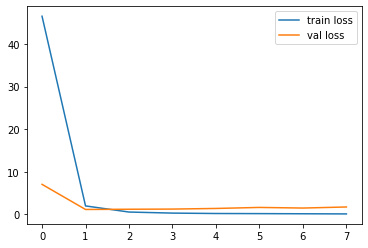

In [ ]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()

plt.savefig('vgg-loss-rps-1.png')
plt.show()

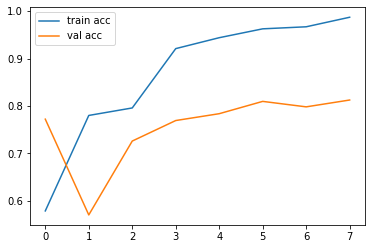

In [ ]:
# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()

plt.savefig('vgg-acc-rps-1.png')
plt.show()

Input image shape: (1, 224, 224, 3)


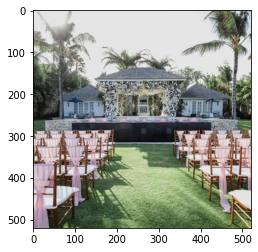

In [ ]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

img_path = '/content/drive/MyDrive/ML/MLDATA/Marriage/1WL_ANUSAUM2_1229.jpg'

img = load_img(img_path, target_size=(224, 224))

x = img_to_array(img)
x = np.expand_dims(x, axis=0)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [ ]:
print(model.predict(x))

[[3.0549135e-10 4.4733736e-10 1.8167988e-12 1.0000000e+00 5.4870586e-08]]


In [ ]:
Model.save

<function keras.engine.training.Model.save>

In [ ]:
model.save("/content/drive/MyDrive/ml_model/model.h5")
# Model.save_weights("model_weights")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import random
a=random.randint(0,10000)
plt.imshow(test_data[a])
print(class_names[np.argmax(predictions[a])])

NameError: ignored